In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [234]:
import ROOT
f=ROOT.TFile("crosscheck/data17265.root","READ")
t=f.Get("tree")

Welcome to JupyROOT 6.22/06


325995

In [240]:
runNumber=17269
scaler_dir="/volatile/clas12/users/gmat/clas12analysis.sidis.data/rgc-scaler8.3.2/run{}_HELScaler-train.csv".format(runNumber)
df_hel = pd.read_csv(scaler_dir,header=None,
                 names=["Run","Entry_Idx","fcupgated","fcup","slmgated","slm","clockgated","clock","helicity","helicityRaw"])

In [241]:
df_hel[df_hel.helicity!=0]

,Run,Entry_Idx,fcupgated,fcup,slmgated,slm,clockgated,clock,helicity,helicityRaw
0,17269,1,0.122591,0.261926,0,0,15371,33330,-1,1
1,17269,2,0.248006,0.261926,0,0,32123,33330,-1,1
2,17269,3,0.254615,0.263030,0,0,32158,33330,1,-1
5,17269,6,0.261245,0.261926,0,0,32132,33330,1,-1
6,17269,7,0.252397,0.261926,0,0,32188,33330,-1,1
...,...,...,...,...,...,...,...,...,...,...
78121,17269,78122,-0.001103,0.260823,0,0,-1,33330,1,-1
78122,17269,78123,0.256782,0.263030,0,0,32270,33330,1,-1
78123,17269,78124,0.253511,0.263030,0,0,32158,33330,1,-1
78124,17269,78125,0.253488,0.264133,0,0,32223,33330,-1,1


In [242]:
x_pos=df_hel[df_hel.helicity==1].Entry_Idx.to_numpy()
y_pos=np.cumsum(df_hel[(df_hel.helicity==1) & (df_hel.clockgated>10)].fcupgated.to_numpy())
y_pos2=df_hel[(df_hel.helicity==1)  & (df_hel.clockgated>10)].fcupgated.to_numpy()
        
x_neg=df_hel[df_hel.helicity==-1].Entry_Idx.to_numpy()
y_neg=np.cumsum(df_hel[(df_hel.helicity==-1)  & (df_hel.clockgated>10)].fcupgated.to_numpy())
y_neg2=df_hel[(df_hel.helicity==-1)  & (df_hel.clockgated>10)].fcupgated.to_numpy()

N = np.amin([len(y_pos),len(y_neg)])

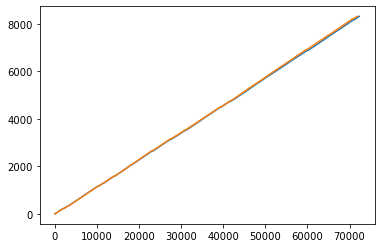

In [243]:
plt.plot(x_pos[:N],y_pos[:N])
plt.plot(x_neg[:N],y_neg[:N])

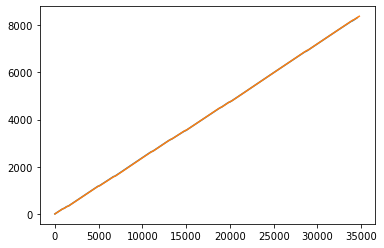

In [244]:
plt.plot(y_pos)
plt.plot(y_neg)

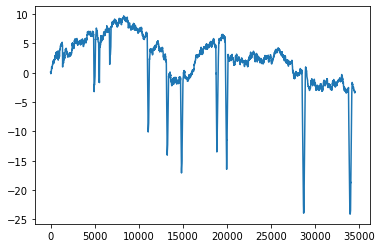

In [245]:
plt.plot(y_pos[:N]-y_neg[:N])

In [246]:
y_pos[-1]/y_neg[-1]
6118/6060

1.0095709570957097

In [236]:
t.GetEntries("helicity==1")/t.GetEntries("helicity==-1")

1.010379797053117

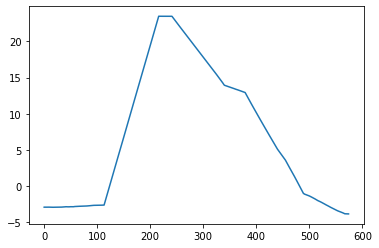

In [172]:
n1=10800
n2=11375

plt.plot(y_pos[n1:n2]-y_neg[n1:n2])

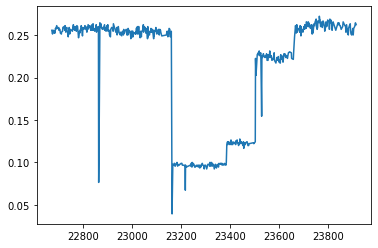

In [173]:
n1=10800
n2=11375
plt.plot(x_pos[n1:n2],y_pos2[n1:n2])

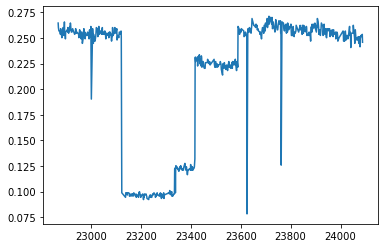

In [134]:
plt.plot(x_neg[n1:n2],y_neg2[n1:n2])

<AxesSubplot:xlabel='clockgated'>

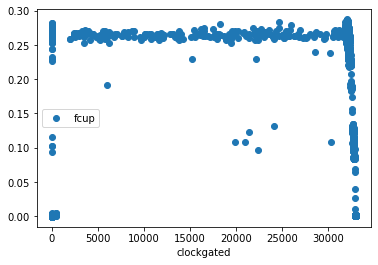

In [183]:
df_hel[df_hel.helicity==1].plot(x="clockgated",y="fcup",style="o")

# Part 2

In [161]:
fcg_mean_pos=np.mean(df_hel[(df_hel.helicity==1)].fcupgated.to_numpy())
fcg_std_pos=np.std(df_hel[(df_hel.helicity==1)].fcupgated.to_numpy())
cond_pos = (df_hel.helicity==1) & (df_hel.fcupgated>fcg_mean_pos-0.25*fcg_std_pos) & (df_hel.fcupgated<fcg_mean_pos+0.25*fcg_std_pos)
x_pos=df_hel[cond_pos].Entry_Idx.to_numpy()
y_pos=df_hel[cond_pos].fcupgated.to_numpy()
y_pos2=np.cumsum(y_pos)

fcg_mean_neg=np.mean(df_hel[(df_hel.helicity==-1)].fcupgated.to_numpy())
fcg_std_neg=np.std(df_hel[(df_hel.helicity==-1)].fcupgated.to_numpy())
cond_neg = (df_hel.helicity==-1) & (df_hel.fcupgated>fcg_mean_neg-0.25*fcg_std_neg) & (df_hel.fcupgated<fcg_mean_neg+0.25*fcg_std_neg)
x_neg=df_hel[cond_neg].Entry_Idx.to_numpy()
y_neg=df_hel[cond_neg].fcupgated.to_numpy()
y_neg2=np.cumsum(y_neg)
N = np.amin([len(y_pos),len(y_neg)])

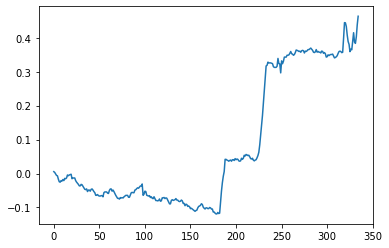

In [162]:
plt.plot(y_pos2[:N]-y_neg2[:N])

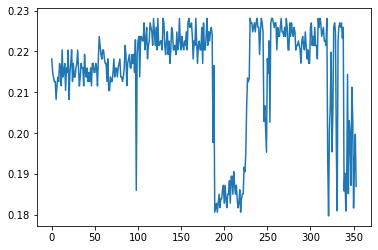

In [163]:
plt.plot(y_pos)

In [153]:
fcg_std_pos

0.09838429652846846

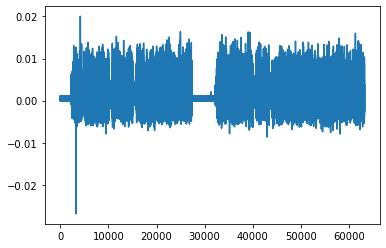

In [200]:
df_HEL=df_hel[df_hel.helicity!=0]
y=
plt.plot(y)

# Part 3

In [207]:
cond_pos = (df_hel.helicity==1) & (np.abs(df_HEL["fcup"]*df_HEL["clockgated"]/33000-df_HEL["fcupgated"])<0.001)
x_pos=df_hel[cond_pos].Entry_Idx.to_numpy()
y_pos=df_hel[cond_pos].fcupgated.to_numpy()
y_pos2=np.cumsum(y_pos)

cond_neg = (df_hel.helicity==-1) & (np.abs(df_HEL["fcup"]*df_HEL["clockgated"]/33000-df_HEL["fcupgated"])<0.001)
x_neg=df_hel[cond_neg].Entry_Idx.to_numpy()
y_neg=df_hel[cond_neg].fcupgated.to_numpy()
y_neg2=np.cumsum(y_neg)
N = np.amin([len(y_pos),len(y_neg)])

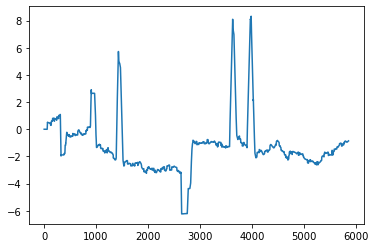

In [208]:
plt.plot(y_pos2[:N]-y_neg2[:N])

# Part 4

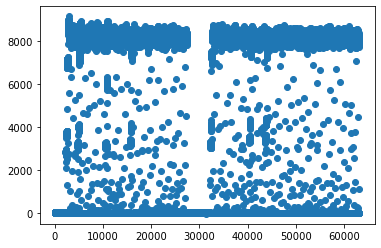

In [211]:
plt.plot(df_hel.fcupgated*df_hel.clockgated,"o")